In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv 

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
csvData = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/UrbanSounds8K.csv')
print(csvData.iloc[1, :]) #example of one row

slice_file_name    100263-2-0-117.wav
fsID                           100263
start                            58.5
end                              62.5
salience                            1
fold                                5
classID                             2
class                children_playing
Name: 1, dtype: object


In [3]:
csvData['salience'] == 2 
csvData['class'] != "car_horn"
csvData.loc[csvData['salience'] == 2].loc[csvData['class'] != "car_horn"]

,slice_file_name,fsID,start,end,salience,fold,classID,class
53,101281-3-0-0.wav,101281,0.341333,4.341333,2,6,3,dog_bark
54,101281-3-0-14.wav,101281,7.341333,11.341333,2,6,3,dog_bark
55,101281-3-0-5.wav,101281,2.841333,6.841333,2,6,3,dog_bark
67,101729-0-0-1.wav,101729,0.500000,4.500000,2,9,0,air_conditioner
68,101729-0-0-11.wav,101729,5.500000,9.500000,2,9,0,air_conditioner
...,...,...,...,...,...,...,...,...
8712,99500-2-0-23.wav,99500,11.500000,15.500000,2,9,2,children_playing
8713,99500-2-0-29.wav,99500,14.500000,18.500000,2,9,2,children_playing
8714,99500-2-0-39.wav,99500,19.500000,23.500000,2,9,2,children_playing
8715,99500-2-0-41.wav,99500,20.500000,24.500000,2,9,2,children_playing


In [4]:
csvData

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [5]:
csvData.groupby("classID").count()

,slice_file_name,fsID,start,end,salience,fold,class
classID,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000
1,429,429,429,429,429,429,429
2,1000,1000,1000,1000,1000,1000,1000
3,1000,1000,1000,1000,1000,1000,1000
4,1000,1000,1000,1000,1000,1000,1000
5,1000,1000,1000,1000,1000,1000,1000
6,374,374,374,374,374,374,374
7,1000,1000,1000,1000,1000,1000,1000
8,929,929,929,929,929,929,929


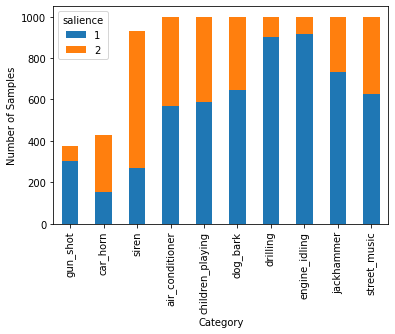

In [8]:
category_group = csvData.groupby(['class', 'salience']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)["fsID"]\
          .plot(kind='bar', stacked=True)
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [ ]:
cnts = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)["fsID"]

cnts.iloc[:, 0]/cnts.iloc[:, 1] #Here we have the proportions of salience 1 to salience 2

class
gun_shot             4.342857
car_horn             0.554348
siren                0.407576
air_conditioner      1.320186
children_playing     1.427184
dog_bark             1.816901
drilling             9.204082
engine_idling       10.904762
jackhammer           2.717472
street_music         1.666667
dtype: float64

Load in some raw wav files


In [ ]:
import librosa
exampleWav = "/drive/MyDrive/Colab Notebooks/Thesis Notebooks/7061-6-0-0.wav"
y,rate = librosa.load(exampleWav, sr = 32000, mono = True)

In [ ]:
print("Sampling (frame) rate = ", 32000)
print("Total samples (frames) = ", len(y))
print("Duration = ", len(y)/32000)

Sampling (frame) rate =  32000
Total samples (frames) =  72000
Duration =  2.25


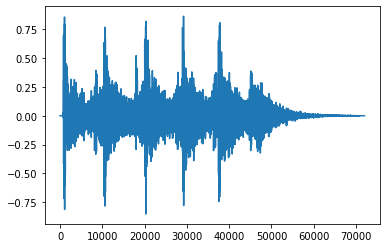

In [ ]:
plt.plot(y, '-', );

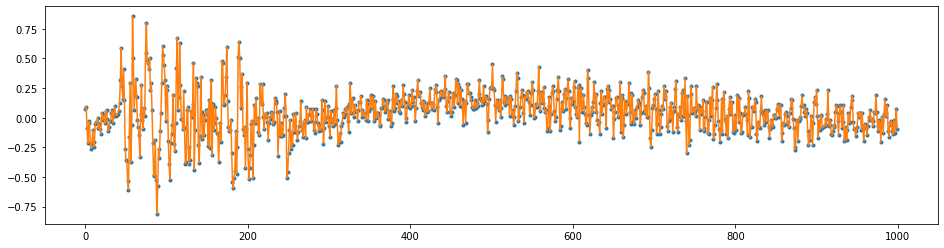

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(y[1000:2000], '.'); plt.plot(y[1000:2000], '-');

Let's also analyse the audio lengths. We can get these by subtracting the start and ends in the metadata.

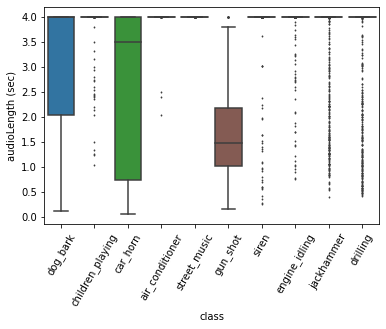

In [ ]:
audioLenDf = pd.DataFrame({"audioLength (sec)": csvData["end"] - csvData["start"], "class": csvData["class"]})
sns.boxplot(data=audioLenDf, x="class", y="audioLength (sec)", fliersize=1)
plt.xticks(rotation=60);

In [ ]:
any(audioLenDf["audioLength"]<0)

False